   ### An Overview about Project


In this project my object is to build  a machine learning model that can learn from the previous measurements of irises whose species is already known, so that I can predict the new species for a new iris i can come across at time. so let's get started


#### In this project as we will need to classify the species of iris, this implies that this is classification problem

The data we will use for this example is the Iris dataset, a classical dataset in machine learning and statistics. It is included in scikit-learn in the datasets module. We can load it by calling the load_iris function

In [26]:
from sklearn.datasets import load_iris
iris_data= load_iris()

Import all required phyton packages/libralies

In [38]:
import numpy as np
import pandas as pd
import scipy
from scipy import sparse
import matplotlib.pyplot as plt

import numpy as np
%matplotlib inline
%matplotlib notebook

this iris data contains key value pairs and value as dictionary. so we can load them accordingly

In [5]:
print("Keys of iris_dataset: \n{}".format(iris_data.keys()))


Keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [7]:
#also we can load every value of key value pairs
print(iris_data['DESCR'][:193] + "\n...")


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [9]:
print("Target names: {}".format(iris_data['target_names']))


Target names: ['setosa' 'versicolor' 'virginica']


In [10]:
print("Feature names: \n{}".format(iris_data['feature_names']))


Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [15]:

print("Type of data: {}".format(type(iris_data['data'])))

print("Shape of data:{}".format(iris_data['data'].shape))

#The shape of the data array is the number of samples multiplied by the number of features
print("First five columns of data:\n{}".format(iris_data['data'][:5]))


Type of data: <class 'numpy.ndarray'>
Shape of data:(150, 4)
First five columns of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [18]:
print("Type of target: {}".format(type(iris_data['target'])))
print("Shape of target: {}".format(iris_data['target'].shape))
#The species are encoded as integers from 0 to 2:

print("Target:\n{}".format(iris_data['target']))
#The meanings of the numbers are given by the iris['target_names'] array: 0 means setosa, 1 means versicolor, and 2 means virginica. 


Type of target: <class 'numpy.ndarray'>
Shape of target: (150,)
Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


###### The meanings of the numbers are given by the iris['target_names'] array: 0 means setosa, 1 means versicolor, and 2 means virginica. 

### Measuring Success: Training and Testing Data

###### We want to build a machine learning model from this data that can predict the species of iris for a new set of measurements. But before we can apply our model to new measurements, we need to know whether it actually works—that is, whether we should trust its predictions. 

To assess the model’s performance, we show it new data (data that it hasn’t seen before) for which we have labels. This is usually done by splitting the labeled data we have collected (here, our 150 flower measurements) into two parts. One part of the data is used to build our machine learning model, and is called the training data or training set. The rest of the data will be used to assess how well the model works; this is called the test data, test set, or hold-out set. scikit-learn contains a function that shuffles the dataset and splits it for you: the train_test_split function. This function extracts 75% of the rows in the data as the training set, together with the corresponding labels for this data. The remaining 25% of the data, together with the remaining labels, is declared as the test set

In [20]:
#Let’s call train_test_split on our data and assign the outputs using this nomenclature:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(iris_data['data'], iris_data['target'], random_state=0) 

In [21]:
print("X_train shape: {}".format(X_train.shape)) 
print("y_train shape: {}".format(y_train.shape))


X_train shape: (112, 4)
y_train shape: (112,)


In [22]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))


X_test shape: (38, 4)
y_test shape: (38,)


<IPython.core.display.Javascript object>


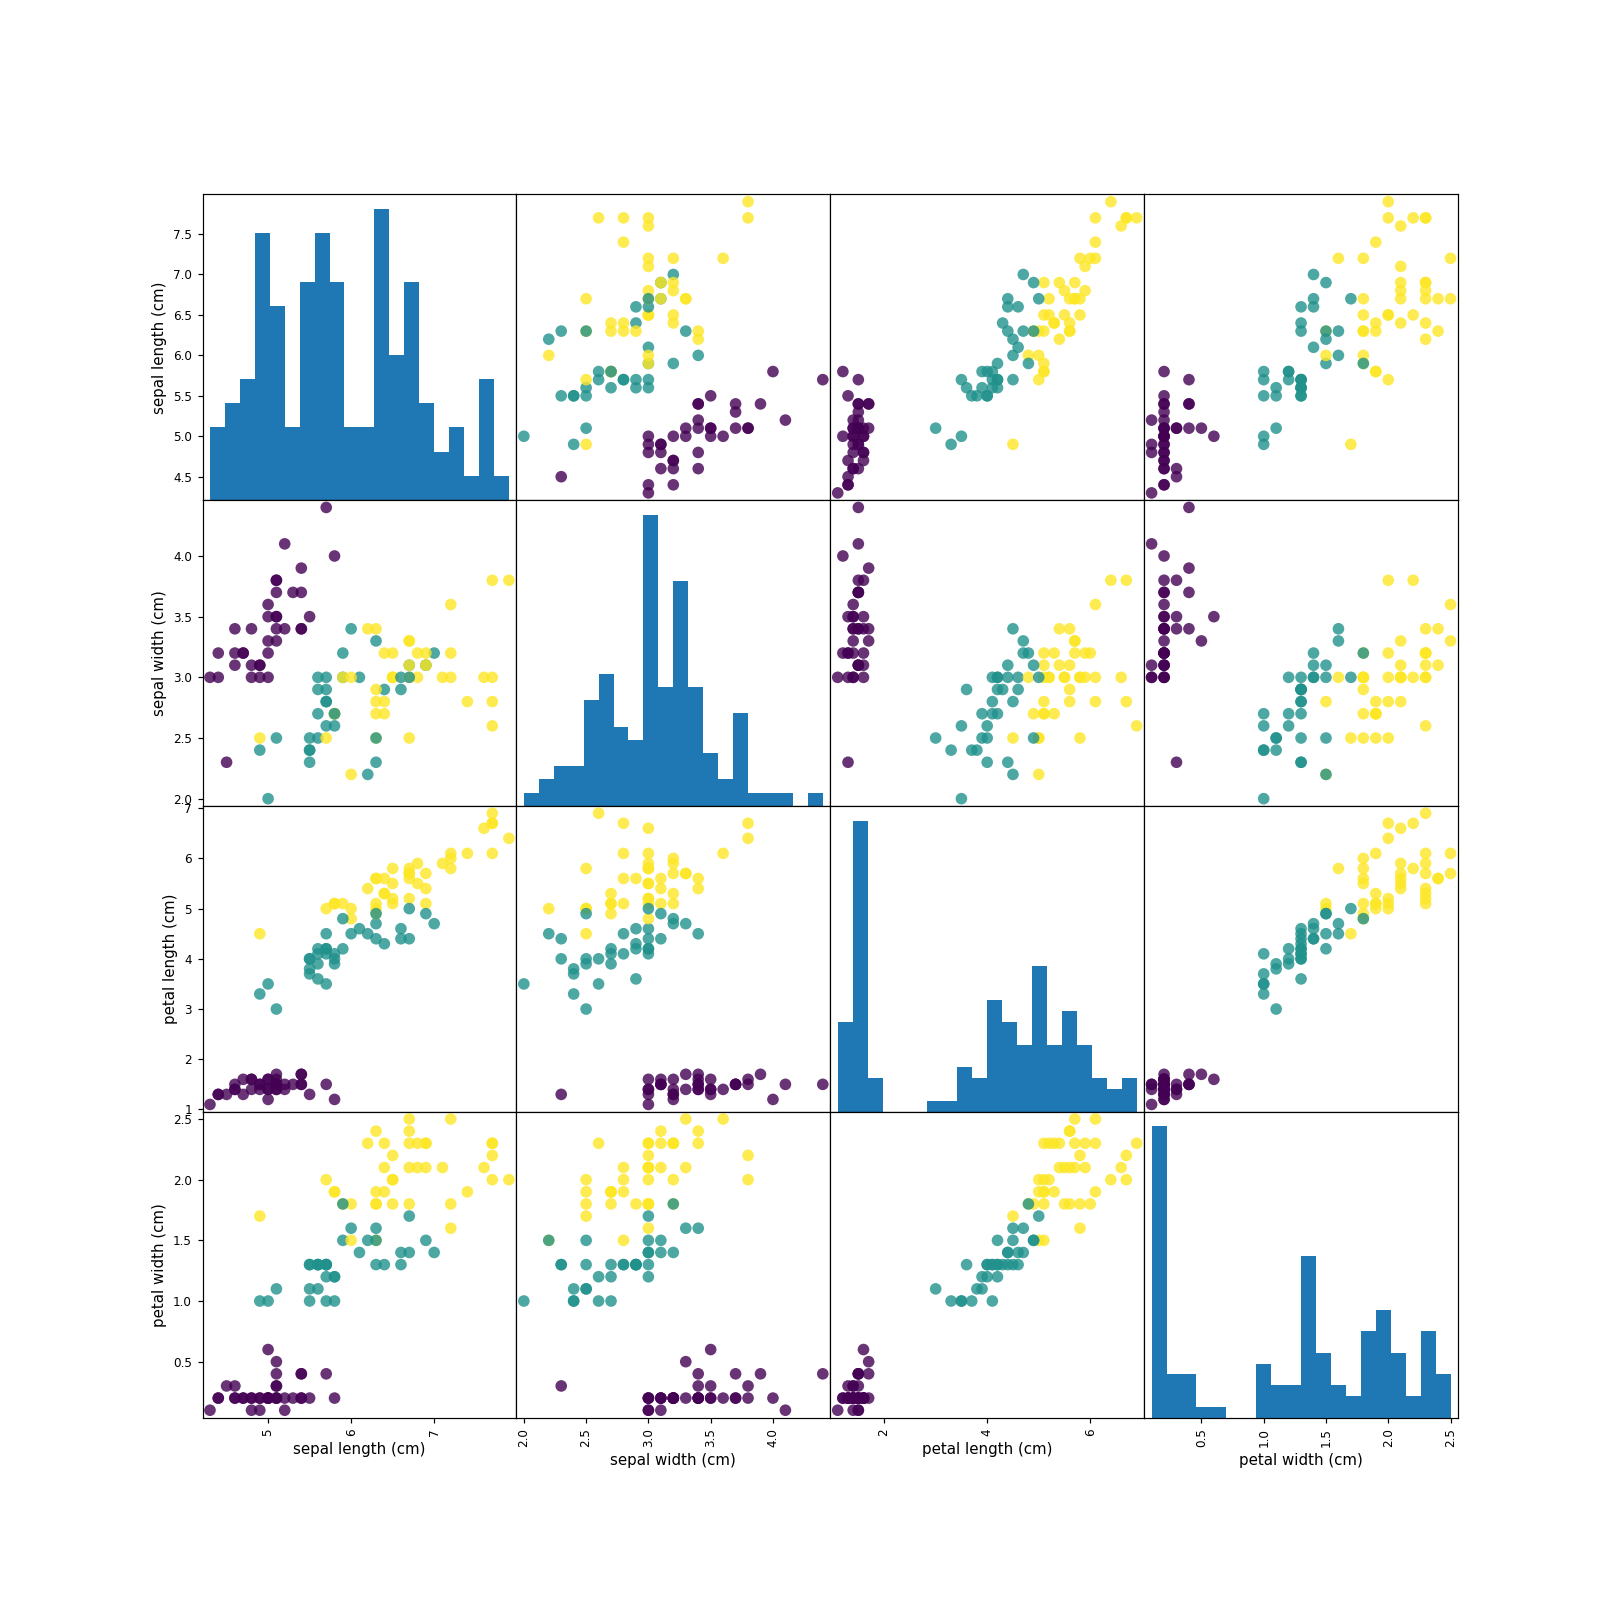

In [29]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names 
iris_dataframe = pd.DataFrame(X_train, columns=iris_data.feature_names) 
# create a scatter matrix from the dataframe, color by y_train
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',hist_kwds={'bins': 20}, s=60, alpha=.8)


From the plots, we can see that the three classes seem to be relatively well separated using the sepal and petal measurements. This means that a machine learning model will likely be able to learn to separate them. 

## Building Your First Model: k-Nearest Neighbors 

There are many classification algorithms in scikit-learn that we could use. Here we will use a k-nearest neighbors classifier, which is easy to understand. Building this model only consists of storing the training set. To make a prediction for a new data point, the algorithm finds the point in the training set that is closest to the new point. Then it assigns the label of this training point to the new data point.


In [31]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

## Making Predictions 

#We can now make predictions using this model on new data for which we might not know the correct labels. Imagine we found an iris in the wild with a sepal length of 5 cm, a sepal width of 2.9 cm, a petal length of 1 cm, and a petal width of 0.2 cm. What species of iris would this be? 

In [32]:
X_new = np.array([[5, 2.9, 1, 0.2]]) 
print("X_new.shape: {}".format(X_new.shape))


X_new.shape: (1, 4)


In [34]:
prediction = knn.predict(X_new) 
print("Prediction: {}".format(prediction)) 
print("Predicted target name: {}".format(iris_data['target_names'][prediction]))


Prediction: [0]
Predicted target name: ['setosa']


Our model predicts that this new iris belongs to the class 0, meaning its species is setosa. 
But how do we know whether we can trust our model? We don’t know the correct species of this sample, which is the whole point of building the model! 

#         Evaluating the Model 


This is where the test set that we created earlier comes in. This data was not used to build the model, but we do know what the correct species is for each iris in the test set. Therefore, we can make a prediction for each iris in the test data and compare it against its label (the known species). We can measure how well the model works by computing the accuracy, which is the fraction of flowers for which the right species was predicted:


In [35]:
y_pred = knn.predict(X_test) 
print("Test set predictions:\n {}".format(y_pred))


Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [36]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))


Test set score: 0.97


We can also use the score method of the knn object, which will compute the test set accuracy for us:


In [37]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))


Test set score: 0.97


For this model, the test set accuracy is about 0.97, which means we made the right prediction for 97% of the irises in the test set. 

In this project I have used a dataset of measurements that was annotated by an expert with the correct species to build our model, making this a supervised learning task. There were three possible species, setosa, versicolor, or virginica, which made the task a three-class classification problem. The possible species are called classes in the classification problem, and the species of a single iris is called its label. 